In [ ]:
# prompt: import drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np
from statsmodels.stats.multitest import multipletests
from scipy.stats import fisher_exact
from statsmodels.stats.multitest import multipletests

In [ ]:
# Install R and R magic
!apt-get install -y libcurl4-openssl-dev libssl-dev libxml2-dev
%load_ext rpy2.ipython

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libcurl4-openssl-dev is already the newest version (7.81.0-1ubuntu1.20).
libssl-dev is already the newest version (3.0.2-0ubuntu1.19).
libxml2-dev is already the newest version (2.9.13+dfsg-1ubuntu0.7).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
# Define the base folder path to your project directory in Google Drive
Ds_project_folder_path = '/content/drive/MyDrive/DS_project/'
data_spliting_meta_data_path = 'Data/5_Inter-cohort_preprocessing/5.1.data_spliting/'
splited_data_save_path = 'Data/5_Inter-cohort_preprocessing/5.2.data_cleaning(Feature_filtering)/'
batch_correction_save_path = 'Data/5_Inter-cohort_preprocessing/5.3.2.probe_to_Ensembl/'
feature_selection_save_path = 'Data/5_Inter-cohort_preprocessing/5.4.feature_selection/'

In [ ]:
feature_selection_file_path = Ds_project_folder_path + feature_selection_save_path
split_file_path = Ds_project_folder_path + splited_data_save_path

In [ ]:
number_of_top_gene = 1000

# RNA seq

### DEG Method

In [ ]:
# %%R

# # Define the base folder path to your project directory in Google Drive
# if (!requireNamespace("edgeR", quietly = TRUE)) {
#     install.packages("BiocManager")
#     BiocManager::install("edgeR")
# }
# library(readr)
# library(dplyr)
# library(edgeR)

# library(readr)
# library(dplyr)
# library(edgeR)

# Ds_project_folder_path <- '/content/drive/MyDrive/DS_project/'
# splited_data_save_path <- 'Data/5_Inter-cohort_preprocessing/5.2.data_cleaning(Feature_filtering)/'
# feature_selection_save_path <- 'Data/5_Inter-cohort_preprocessing/5.4.feature_selection/'

# # Load the RData file (e.g., patient clinical data)
# gbm_train <- read_csv(paste0(Ds_project_folder_path, splited_data_save_path,"GBM_rna_seq_train.csv"))

# lgg_train <- read_csv(paste0(Ds_project_folder_path, splited_data_save_path,"LGG_rna_seq_train.csv"))



# gbm_train <- as.data.frame(gbm_train)
# lgg_train <- as.data.frame(lgg_train)
# rownames(gbm_train) <- gbm_train$Sample_ID
# rownames(lgg_train) <- lgg_train$Sample_ID
# gbm_train$Sample_ID <- NULL
# lgg_train$Sample_ID <- NULL

# colnames(gbm_train) <- make.unique(colnames(gbm_train))
# colnames(lgg_train) <- make.unique(colnames(lgg_train))

# train_counts <- cbind(gbm_train, lgg_train)
# group <- factor(c(rep("GBM", ncol(gbm_train)), rep("LGG", ncol(lgg_train))))

# dge <- DGEList(counts = train_counts, group = group)
# dge <- calcNormFactors(dge)
# keep <- rowSums(cpm(dge) > 0.5) >= 2
# dge <- dge[keep, , keep.lib.sizes = FALSE]

# design <- model.matrix(~ group)
# dge <- estimateDisp(dge, design)
# fit <- glmQLFit(dge, design)
# qlf <- glmQLFTest(fit)

# deg_result <- topTags(qlf, n = Inf)$table
# selected_genes <- rownames(deg_result[deg_result$FDR < 0.01, ])

# log_cpm <- cpm(dge, log = TRUE, prior.count = 1)
# log_cpm_deg <- log_cpm[rownames(log_cpm) %in% selected_genes, ]

# sample_info <- data.frame(
#   sample = colnames(log_cpm_deg),
#   group = group
# )

# gbm_samples <- sample_info$sample[sample_info$group == "GBM"]
# lgg_samples <- sample_info$sample[sample_info$group == "LGG"]

# log_cpm_deg_gbm <- log_cpm_deg[, gbm_samples]
# log_cpm_deg_lgg <- log_cpm_deg[, lgg_samples]

# write.csv(log_cpm_deg_gbm, paste0(Ds_project_folder_path, feature_selection_save_path,"GBM_rna_seq_train_feature_selected.csv"))
# write.csv(log_cpm_deg_lgg, paste0(Ds_project_folder_path, feature_selection_save_path,"LGG_rna_seq_train_feature_selected.csv"))


# filter_and_save <- function(input_csv, selected_genes, output_csv) {
#   # Load CSV
#   df <- readr::read_csv(input_csv, show_col_types = FALSE)
#   df <- as.data.frame(df)

#   # Set rownames
#   rownames(df) <- df$Sample_ID
#   df$Sample_ID <- NULL

#   # Convert to integer (in case it's read as double)
#   df[] <- lapply(df, as.numeric)

#   # Create DGEList and normalize
#   dge <- edgeR::DGEList(counts = df)
#   dge <- edgeR::calcNormFactors(dge)

#   # CPM log2 transformation
#   log_cpm <- edgeR::cpm(dge, log = TRUE, prior.count = 1)

#   # Filter only selected genes
#   df_filtered <- log_cpm[rownames(log_cpm) %in% selected_genes, , drop = FALSE]

#   # Check if any genes matched
#   if (nrow(df_filtered) == 0) {
#     warning(paste("No matching genes found in", input_csv))
#   }

#   # Add gene_name as first column
#   df_filtered <- cbind(Sample_ID = rownames(df_filtered), as.data.frame(df_filtered))

#   # Save to CSV
#   write.csv(df_filtered, output_csv, row.names = FALSE)
# }


# filter_and_save(paste0(Ds_project_folder_path, splited_data_save_path,"GBM_rna_seq_val.csv"), selected_genes,
#                 paste0(Ds_project_folder_path, feature_selection_save_path,"GBM_rna_seq_train_feature_selected.csv"))
# filter_and_save(paste0(Ds_project_folder_path, splited_data_save_path,"GBM_rna_seq_external_test.csv"), selected_genes,
#                 paste0(Ds_project_folder_path, feature_selection_save_path,"GBM_rna_seq_external_test_feature_selected.csv"))
# filter_and_save(paste0(Ds_project_folder_path, splited_data_save_path,"GBM_rna_seq_internal_test.csv"), selected_genes,
#                 paste0(Ds_project_folder_path, feature_selection_save_path,"GBM_rna_seq_internal_test_feature_selected.csv"))
# filter_and_save(paste0(Ds_project_folder_path, splited_data_save_path,"LGG_rna_seq_val.csv"), selected_genes,
#                 paste0(Ds_project_folder_path, feature_selection_save_path,"LGG_rna_seq_val_feature_selected.csv"))
# filter_and_save(paste0(Ds_project_folder_path, splited_data_save_path,"LGG_rna_seq_external_test.csv"), selected_genes,
#                 paste0(Ds_project_folder_path, feature_selection_save_path,"LGG_rna_seq_external_test_feature_selected.csv"))
# filter_and_save(paste0(Ds_project_folder_path, splited_data_save_path,"LGG_rna_seq_internal_test.csv"), selected_genes,
#                 paste0(Ds_project_folder_path, feature_selection_save_path,"LGG_rna_seq_internal_test_feature_selected.csv"))

Rows: 57670 Columns: 160
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): Sample_ID
dbl (159): TCGA-19-2620-01A, TCGA-06-1804-01A, TCGA-06-6391-01A, TCGA-32-522...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 57670 Columns: 313
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): Sample_ID
dbl (312): TCGA-VW-A8FI-01A, TCGA-QH-A6X3-01A, TCGA-S9-A6WM-01A, TCGA-TM-A7C...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: limma


In [ ]:
# GBM_rna_seq_train = pd.read_csv(f'{feature_selection_file_path}GBM_rna_seq_train_feature_selected.csv', index_col=0)
# GBM_rna_seq_val= pd.read_csv(f'{feature_selection_file_path}GBM_rna_seq_val_feature_selected.csv', index_col=0)
# GBM_rna_seq_external_test= pd.read_csv(f'{feature_selection_file_path}GBM_rna_seq_external_test_feature_selected.csv', index_col=0)
# GBM_rna_seq_internal_test= pd.read_csv(f'{feature_selection_file_path}GBM_rna_seq_internal_test_feature_selected.csv', index_col=0)

# LGG_rna_seq_train= pd.read_csv(f'{feature_selection_file_path}LGG_rna_seq_train_feature_selected.csv', index_col=0)
# LGG_rna_seq_val= pd.read_csv(f'{feature_selection_file_path}LGG_rna_seq_val_feature_selected.csv', index_col=0)
# LGG_rna_seq_external_test= pd.read_csv(f'{feature_selection_file_path}LGG_rna_seq_external_test_feature_selected.csv', index_col=0)
# LGG_rna_seq_internal_test= pd.read_csv(f'{feature_selection_file_path}LGG_rna_seq_internal_test_feature_selected.csv', index_col=0)

In [ ]:
# print(f'selected feature:{len(GBM_rna_seq_train.index)}')

selected feature:29760


#### variance method

In [ ]:
GBM_RNA_seq_train = pd.read_csv(f'{split_file_path}GBM_rna_seq_train.csv', index_col=0)
GBM_RNA_seq_val= pd.read_csv(f'{split_file_path}GBM_rna_seq_val.csv', index_col=0)
GBM_RNA_seq_external_test= pd.read_csv(f'{split_file_path}GBM_rna_seq_external_test.csv', index_col=0)
GBM_RNA_seq_internal_test= pd.read_csv(f'{split_file_path}GBM_rna_seq_internal_test.csv', index_col=0)

LGG_RNA_seq_train= pd.read_csv(f'{split_file_path}LGG_rna_seq_train.csv', index_col=0)
LGG_RNA_seq_val= pd.read_csv(f'{split_file_path}LGG_rna_seq_val.csv', index_col=0)
LGG_RNA_seq_external_test= pd.read_csv(f'{split_file_path}LGG_rna_seq_external_test.csv', index_col=0)
LGG_RNA_seq_internal_test= pd.read_csv(f'{split_file_path}LGG_rna_seq_internal_test.csv', index_col=0)

In [ ]:
def counts_to_log2cpm(count_df):
    counts = count_df.copy()
    lib_sizes = counts.sum(axis=0)
    cpm = counts.divide(lib_sizes, axis=1) * 1e6
    log2_cpm = np.log2(cpm + 1)
    return log2_cpm

In [ ]:
# rna_seq_train = counts_to_log2cpm(pd.concat([GBM_RNA_seq_train, LGG_RNA_seq_train], axis=1))

In [ ]:
# rna_seq_variance = rna_seq_train.var(axis = 1)

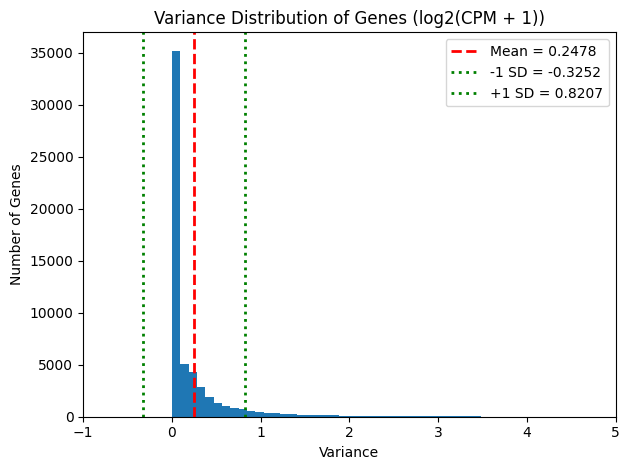

In [ ]:
# plt.hist(rna_seq_variance.values, bins=200)
# mean_var = rna_seq_variance.mean()
# std_var = rna_seq_variance.std()
# plt.axvline(mean_var, color='red', linestyle='--', linewidth=2, label=f"Mean = {mean_var:.4f}")
# plt.axvline(mean_var - std_var, color='green', linestyle=':', linewidth=2, label=f"-1 SD = {mean_var - std_var:.4f}")
# plt.axvline(mean_var + std_var, color='green', linestyle=':', linewidth=2, label=f"+1 SD = {mean_var + std_var:.4f}")

# plt.title("Variance Distribution of Genes (log2(CPM + 1))")
# plt.xlim((-1,5))
# plt.xlabel("Variance")
# plt.ylabel("Number of Genes")
# plt.legend()
# plt.tight_layout()
# plt.show()

In [ ]:
sorted(rna_seq_variance.to_list())[-1000]

2.178520032451598

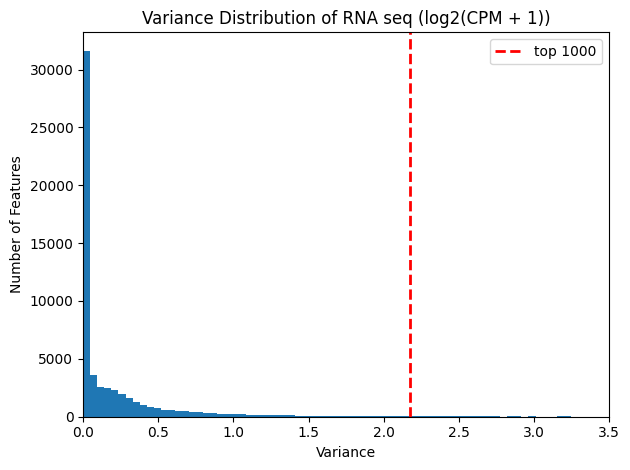

In [ ]:
plt.hist(rna_seq_variance.values, bins=400)
top_1000th = sorted(rna_seq_variance.to_list())[-1000]
std_var = rna_seq_variance.std()
plt.axvline(top_1000th, color='red', linestyle='--', linewidth=2, label=f"top 1000")
#plt.axvline(mean_var - std_var, color='green', linestyle=':', linewidth=2, label=f"-1 SD = {mean_var - std_var:.4f}")
#plt.axvline(mean_var + std_var, color='green', linestyle=':', linewidth=2, label=f"+1 SD = {mean_var + std_var:.4f}")

plt.title("Variance Distribution of RNA seq (log2(CPM + 1))")
plt.xlim((0,3.5))
plt.xlabel("Variance")
plt.ylabel("Number of Features")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
threshold = mean_var + std_var
selected_genes = rna_seq_variance[rna_seq_variance > threshold].index

In [ ]:
print(f"# of selected features: {len(selected_genes)}")

# of selected features: 4690


SD

In [ ]:
counts_to_log2cpm(GBM_RNA_seq_train).loc[selected_genes].to_csv(f'{feature_selection_file_path}GBM_rna_seq_train_feature_selected_by_var_sd1.csv')
counts_to_log2cpm(GBM_RNA_seq_val).loc[selected_genes].to_csv(f'{feature_selection_file_path}GBM_rna_seq_val_feature_selected_by_var_sd1.csv')
counts_to_log2cpm(GBM_RNA_seq_external_test).loc[selected_genes].to_csv(f'{feature_selection_file_path}GBM_rna_seq_external_test_feature_selected_by_var_sd1.csv')
counts_to_log2cpm(GBM_RNA_seq_internal_test).loc[selected_genes].to_csv(f'{feature_selection_file_path}GBM_rna_seq_internal_test_feature_selected_by_var_sd1.csv')

counts_to_log2cpm(LGG_RNA_seq_train).loc[selected_genes].to_csv(f'{feature_selection_file_path}LGG_rna_seq_train_feature_selected_by_var_sd1.csv')
counts_to_log2cpm(LGG_RNA_seq_val).loc[selected_genes].to_csv(f'{feature_selection_file_path}LGG_rna_seq_val_feature_selected_by_var_sd1.csv')
counts_to_log2cpm(LGG_RNA_seq_external_test).loc[selected_genes].to_csv(f'{feature_selection_file_path}LGG_rna_seq_external_test_feature_selected_by_var_sd1.csv')
counts_to_log2cpm(LGG_RNA_seq_internal_test).loc[selected_genes].to_csv(f'{feature_selection_file_path}LGG_rna_seq_internal_test_feature_selected_by_var_sd1.csv')

top_variance

In [ ]:
counts_to_log2cpm(GBM_RNA_seq_train).loc[rna_seq_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}GBM_rna_seq_train_feature_selected_top_{number_of_top_gene}.csv')
counts_to_log2cpm(GBM_RNA_seq_val).loc[rna_seq_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}GBM_rna_seq_val_feature_selected_top_{number_of_top_gene}.csv')
counts_to_log2cpm(GBM_RNA_seq_external_test).loc[rna_seq_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}GBM_rna_seq_external_test_feature_selected_top_{number_of_top_gene}.csv')
counts_to_log2cpm(GBM_RNA_seq_internal_test).loc[rna_seq_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}GBM_rna_seq_internal_test_feature_selected_top_{number_of_top_gene}.csv')

counts_to_log2cpm(LGG_RNA_seq_train).loc[rna_seq_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}LGG_rna_seq_train_feature_selected_top_{number_of_top_gene}.csv')
counts_to_log2cpm(LGG_RNA_seq_val).loc[rna_seq_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}LGG_rna_seq_val_feature_selected_top_{number_of_top_gene}.csv')
counts_to_log2cpm(LGG_RNA_seq_external_test).loc[rna_seq_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}LGG_rna_seq_external_test_feature_selected_top_{number_of_top_gene}.csv')
counts_to_log2cpm(LGG_RNA_seq_internal_test).loc[rna_seq_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}LGG_rna_seq_internal_test_feature_selected_top_{number_of_top_gene}.csv')

## CNV

### filtered by chi square test

In [ ]:
# GBM_CNV_train = pd.read_csv(f'{split_file_path}GBM_CNV_train.csv', index_col=0)
# GBM_CNV_val= pd.read_csv(f'{split_file_path}GBM_CNV_val.csv', index_col=0)
# GBM_CNV_external_test= pd.read_csv(f'{split_file_path}GBM_CNV_external_test.csv', index_col=0)
# GBM_CNV_internal_test= pd.read_csv(f'{split_file_path}GBM_CNV_internal_test.csv', index_col=0)

# LGG_CNV_train= pd.read_csv(f'{split_file_path}LGG_CNV_train.csv', index_col=0)
# LGG_CNV_val= pd.read_csv(f'{split_file_path}LGG_CNV_val.csv', index_col=0)
# LGG_CNV_external_test= pd.read_csv(f'{split_file_path}LGG_CNV_external_test.csv', index_col=0)
# LGG_CNV_internal_test= pd.read_csv(f'{split_file_path}LGG_CNV_internal_test.csv', index_col=0)

In [ ]:
# assert GBM_CNV_train.index.equals(LGG_CNV_train.index), "Gene index mismatch"
# CNV_train = pd.concat([GBM_CNV_train, LGG_CNV_train], axis=1)

In [ ]:
# gene_variance = CNV_train.var(axis = 1)
# top_genes = gene_variance.sort_values(ascending=False).head(len(CNV_train)).index
# cnv_top = CNV_train.loc[top_genes]

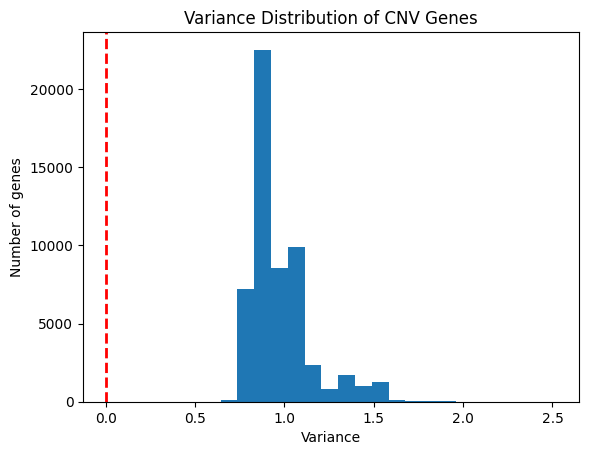

In [ ]:
# plt.hist(gene_variance.values, bins=20)
# plt.xlabel("Variance")
# plt.ylabel("Number of genes")
# plt.title("Variance Distribution of CNV Genes")
# plt.axvline(x=0.0, color='red', linestyle='--', linewidth=2, label='Threshold = 0')
# plt.show()

In [ ]:
# gbm_samples = GBM_CNV_train.columns.tolist()
# lgg_samples = LGG_CNV_train.columns.tolist()
# group_df = pd.DataFrame({
#     'sample': gbm_samples + lgg_samples,
#     'label': ['GBM'] * len(gbm_samples) + ['LGG'] * len(lgg_samples)
# })

In [ ]:
# def count_cnv_states(values):
#     return [
#         int((values < 2).sum()),      # loss
#         int((values == 2).sum()),     # normal
#         int((values > 2).sum())       # gain
#     ]

In [ ]:
# results = []
# for gene in cnv_top.index:
#     gbm_vals = cnv_top.loc[gene, gbm_samples]
#     lgg_vals = cnv_top.loc[gene, lgg_samples]

#     gbm_counts = count_cnv_states(gbm_vals)  # [loss, normal, gain]
#     lgg_counts = count_cnv_states(lgg_vals)

#     contingency = np.array([gbm_counts, lgg_counts]).T  # shape: (3, 2)

#     # chi² test
#     chi2, pval, _, _ = chi2_contingency(contingency)

#     results.append({
#         'gene': gene,
#         'gbm_loss': gbm_counts[0] / len(gbm_vals),
#         'gbm_normal': gbm_counts[1] / len(gbm_vals),
#         'gbm_gain': gbm_counts[2] / len(gbm_vals),
#         'lgg_loss': lgg_counts[0] / len(lgg_vals),
#         'lgg_normal': lgg_counts[1] / len(lgg_vals),
#         'lgg_gain': lgg_counts[2] / len(lgg_vals),
#         'p_value': pval
#     })

In [ ]:
# result_df = pd.DataFrame(results)
# rejected, fdr_values, _, _ = multipletests(result_df['p_value'], method='fdr_bh')
# result_df['FDR'] = fdr_values
# result_df['significant'] = rejected

# significant_genes = result_df[result_df['FDR'] < 0.01].sort_values('FDR')

# print("# of significant genes:", len(significant_genes))
# print(significant_genes[['gene', 'gbm_gain', 'lgg_gain', 'FDR']].head(10))

# of significant genes: 52921
                     gene  gbm_gain  lgg_gain           FDR
12494   ENSG00000235426.2  0.053004  0.319355  1.367549e-51
12495  ENSG00000108179.14  0.053004  0.319355  1.367549e-51
12497   ENSG00000165424.7  0.053004  0.319355  1.367549e-51
12647  ENSG00000108175.17  0.053004  0.319355  3.091309e-51
13759  ENSG00000122852.15  0.053004  0.309677  3.697807e-51
13760   ENSG00000226676.1  0.053004  0.309677  3.697807e-51
13758  ENSG00000185303.17  0.053004  0.309677  3.697807e-51
13755   ENSG00000214695.3  0.053004  0.309677  3.697807e-51
13764   ENSG00000232965.1  0.053004  0.309677  3.697807e-51
13765   ENSG00000235705.6  0.053004  0.309677  3.697807e-51


In [ ]:
# selected_genes = significant_genes['gene'].values

In [ ]:
# def filter_and_save(df, name):
#     df_filtered = df.loc[df.index.intersection(selected_genes)]
#     output_path = feature_selection_file_path +f'{name}.csv'
#     df_filtered.to_csv(output_path)

# filter_and_save(GBM_CNV_train, "GBM_CNV_train_feature_selected")
# filter_and_save(GBM_CNV_val, "GBM_CNV_val_feature_selected")
# filter_and_save(GBM_CNV_external_test, "GBM_CNV_external_test_feature_selected")
# filter_and_save(GBM_CNV_internal_test, "GBM_CNV_internal_test_feature_selected")

# filter_and_save(LGG_CNV_train, "LGG_CNV_train_feature_selected")
# filter_and_save(LGG_CNV_val, "LGG_CNV_val_feature_selected")
# filter_and_save(LGG_CNV_external_test, "LGG_CNV_external_test_feature_selected")
# filter_and_save(LGG_CNV_internal_test, "LGG_CNV_internal_test_feature_selected")

### filltered by variance

In [ ]:
GBM_CNV_train = pd.read_csv(f'{split_file_path}GBM_CNV_train.csv', index_col=0)
GBM_CNV_val= pd.read_csv(f'{split_file_path}GBM_CNV_val.csv', index_col=0)
GBM_CNV_external_test= pd.read_csv(f'{split_file_path}GBM_CNV_external_test.csv', index_col=0)
GBM_CNV_internal_test= pd.read_csv(f'{split_file_path}GBM_CNV_internal_test.csv', index_col=0)

LGG_CNV_train= pd.read_csv(f'{split_file_path}LGG_CNV_train.csv', index_col=0)
LGG_CNV_val= pd.read_csv(f'{split_file_path}LGG_CNV_val.csv', index_col=0)
LGG_CNV_external_test= pd.read_csv(f'{split_file_path}LGG_CNV_external_test.csv', index_col=0)
LGG_CNV_internal_test= pd.read_csv(f'{split_file_path}LGG_CNV_internal_test.csv', index_col=0)

In [ ]:
CNV_train = pd.concat([GBM_CNV_train, LGG_CNV_train], axis=1)

In [ ]:
CNV_variance = CNV_train.var(axis = 1)

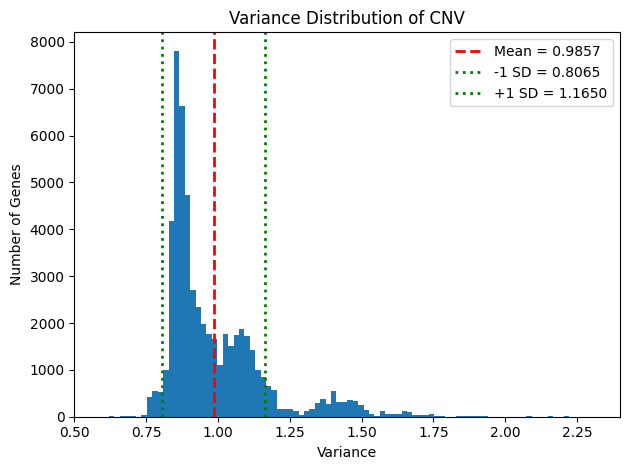

In [ ]:
plt.hist(CNV_variance.values, bins=100)
mean_var = CNV_variance.mean()
std_var = CNV_variance.std()
plt.axvline(mean_var, color='red', linestyle='--', linewidth=2, label=f"Mean = {mean_var:.4f}")
plt.axvline(mean_var - std_var, color='green', linestyle=':', linewidth=2, label=f"-1 SD = {mean_var - std_var:.4f}")
plt.axvline(mean_var + std_var, color='green', linestyle=':', linewidth=2, label=f"+1 SD = {mean_var + std_var:.4f}")

plt.title("Variance Distribution of CNV")
plt.xlim((0.5,2.4))
plt.xlabel("Variance")
plt.ylabel("Number of Genes")
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'rna_seq_variance' is not defined

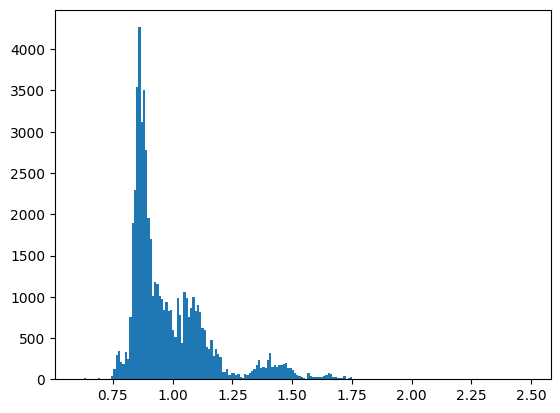

In [ ]:
plt.hist(CNV_variance.values, bins=200)
top_1000th = sorted(CNV_variance.to_list())[-1000]
std_var = CNV_variance.std()
plt.axvline(top_1000th, color='red', linestyle='--', linewidth=2, label=f"top 1000")
#plt.axvline(mean_var - std_var, color='green', linestyle=':', linewidth=2, label=f"-1 SD = {mean_var - std_var:.4f}")
#plt.axvline(mean_var + std_var, color='green', linestyle=':', linewidth=2, label=f"+1 SD = {mean_var + std_var:.4f}")

plt.title("Variance Distribution of CNV")
plt.xlim((0.5,2.4))
plt.xlabel("Variance")
plt.ylabel("Number of Features")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
threshold = mean_var + std_var
selected_genes = CNV_variance[CNV_variance > threshold].index

In [ ]:
print(f"# of selected features: {len(selected_genes)}")

# of selected features: 6358


In [ ]:
CNV_variance.sort_values(ascending=False).head(1000).index

Index(['ENSG00000234707.3', 'ENSG00000132432.14', 'ENSG00000286404.1',
       'ENSG00000146648.19', 'ENSG00000288525.1', 'ENSG00000232612.1',
       'ENSG00000218586.3', 'ENSG00000224057.1', 'ENSG00000135452.10',
       'ENSG00000135446.17',
       ...
       'ENSG00000277083.1', 'ENSG00000211707.3', 'ENSG00000226660.2',
       'ENSG00000271096.1', 'ENSG00000281887.3', 'ENSG00000241134.3',
       'ENSG00000106565.18', 'ENSG00000002933.9', 'ENSG00000002726.21',
       'ENSG00000133561.15'],
      dtype='object', name='Ensembl_ID', length=1000)

In [ ]:
GBM_CNV_train.loc[selected_genes].to_csv(f'{feature_selection_file_path}GBM_CNV_train_feature_selected_by_var_sd1.csv')
GBM_CNV_val.loc[selected_genes].to_csv(f'{feature_selection_file_path}GBM_CNV_val_feature_selected_by_var_sd1.csv')
GBM_CNV_external_test.loc[selected_genes].to_csv(f'{feature_selection_file_path}GBM_CNV_external_test_feature_selected_by_var_sd1.csv')
GBM_CNV_internal_test.loc[selected_genes].to_csv(f'{feature_selection_file_path}GBM_CNV_internal_test_feature_selected_by_var_sd1.csv')

LGG_CNV_train.loc[selected_genes].to_csv(f'{feature_selection_file_path}LGG_CNV_train_feature_selected_by_var_sd1.csv')
LGG_CNV_val.loc[selected_genes].to_csv(f'{feature_selection_file_path}LGG_CNV_val_feature_selected_by_var_sd1.csv')
LGG_CNV_external_test.loc[selected_genes].to_csv(f'{feature_selection_file_path}LGG_CNV_external_test_feature_selected_by_var_sd1.csv')
LGG_CNV_internal_test.loc[selected_genes].to_csv(f'{feature_selection_file_path}LGG_CNV_internal_test_feature_selected_by_var_sd1.csv')

In [ ]:
GBM_CNV_train.loc[CNV_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}GBM_CNV_train_feature_selected_top_{number_of_top_gene}.csv')
GBM_CNV_val.loc[CNV_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}GBM_CNV_val_feature_selected_top_{number_of_top_gene}.csv')
GBM_CNV_external_test.loc[CNV_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}GBM_CNV_external_test_feature_selected_top_{number_of_top_gene}.csv')
GBM_CNV_internal_test.loc[CNV_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}GBM_CNV_internal_test_feature_selected_top_{number_of_top_gene}.csv')

LGG_CNV_train.loc[CNV_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}LGG_CNV_train_feature_selected_top_{number_of_top_gene}.csv')
LGG_CNV_val.loc[CNV_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}LGG_CNV_val_feature_selected_top_{number_of_top_gene}.csv')
LGG_CNV_external_test.loc[CNV_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}LGG_CNV_external_test_feature_selected_top_{number_of_top_gene}.csv')
LGG_CNV_internal_test.loc[CNV_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}LGG_CNV_internal_test_feature_selected_top_{number_of_top_gene}.csv')

## Methylation

### DMP

In [ ]:
# %%R
# required_packages <- c(
#   "dplyr", "readr", "stringr", "tibble", "limma",
#   "DMRcate", "GenomicRanges", "ggplot2", "data.table"
# )

# packages_to_install <- required_packages[!(required_packages %in% installed.packages()[, "Package"])]
# if(length(packages_to_install)) {
#   install.packages(packages_to_install, dependencies = TRUE)
# }

# if (!"DMRcate" %in% installed.packages()) {
#   if (!requireNamespace("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")
#   BiocManager::install("DMRcate")
# }

# invisible(lapply(required_packages, library, character.only = TRUE))

# Ds_project_folder_path <- '/content/drive/MyDrive/DS_project'
# splited_data_save_path <- 'Data/5_Inter-cohort_preprocessing/5.2.data_cleaning(Feature_filtering)'
# batch_corrected_save_path <-'Data/5_Inter-cohort_preprocessing/5.3.batch_correction'
# output_dir_split <- file.path(Ds_project_folder_path, splited_data_save_path)
# output_dir_batch <- file.path(Ds_project_folder_path, batch_corrected_save_path)
# feature_selection_save_path <-file.path(Ds_project_folder_path,'Data/5_Inter-cohort_preprocessing/5.4.feature_selection')



# gbm_train_raw <- read_csv(file.path(output_dir_batch, "GBM_methylation_450_27_batch_corrected_train.csv"))
# first_colname <- names(gbm_train_raw)[1]

# gbm_train <- tibble::column_to_rownames(as.data.frame(gbm_train_raw), var = first_colname)

# lgg_train_raw <- read_csv(file.path(output_dir_split, "LGG_methylation_train.csv"))
# first_colname_lgg <- names(lgg_train_raw)[1]
# lgg_train <- tibble::column_to_rownames(as.data.frame(lgg_train_raw), var = first_colname_lgg)


# common_probes <- intersect(rownames(gbm_train), rownames(lgg_train))
# gbm_mat <- gbm_train[common_probes, ]
# lgg_mat <- lgg_train[common_probes, ]
# expr_mat <- cbind(gbm_mat, lgg_mat)

# group <- factor(c(rep("GBM", ncol(gbm_mat)), rep("LGG", ncol(lgg_mat))))
# design <- model.matrix(~ group)
# fit <- lmFit(expr_mat, design)
# fit <- eBayes(fit)
# topTable_res <- topTable(fit, coef = 2, number = Inf, adjust = "BH")

# selected_probes <- rownames(topTable_res[topTable_res$adj.P.Val < 0.01, ])
# message("# of significant DMP: ", length(selected_probes))

# filter_and_save <- function(file_name, output_name) {
#   full_path <- file_name
#   if (!file.exists(full_path)) {
#     warning("File does not exist: ", full_path)
#     return(NULL)
#   }
#   df <- read.csv(full_path, row.names = 1, check.names = FALSE)
#   df_filtered <- df[intersect(rownames(df), selected_probes), , drop = FALSE]
#   write.csv(df_filtered,
#             file = file.path(feature_selection_save_path, paste0(output_name, "_selected.csv")),
#             row.names = TRUE)
#   message("Saved: ", output_name, "_selected.csv [", nrow(df_filtered), " probes]")
#   }

# filter_and_save(file.path(output_dir_batch, "GBM_methylation_450_27_batch_corrected_train.csv"), "GBM_methylation_train")
# filter_and_save(file.path(output_dir_batch, "GBM_methylation_450_27_batch_corrected_val.csv"), "GBM_methylation_val")
# filter_and_save(file.path(output_dir_batch,"GBM_methylation_450_27_batch_corrected_external_test.csv"), "GBM_methylation_external_test")
# filter_and_save(file.path(output_dir_batch, "GBM_methylation_450_27_batch_corrected_internal_test.csv"), "GBM_methylation_internal_test")

# filter_and_save(file.path(output_dir_split, "LGG_methylation_train.csv"), "LGG_methylation_train")
# filter_and_save(file.path(output_dir_split, "LGG_methylation_val.csv"), "LGG_methylation_val")
# filter_and_save(file.path(output_dir_split, "LGG_methylation_external_test.csv"), "LGG_methylation_external_test")
# filter_and_save(file.path(output_dir_split, "LGG_methylation_internal_test.csv"), "LGG_methylation_internal_test")

New names:
• `` -> `...1`
Rows: 19471 Columns: 257
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): ...1
dbl (256): TCGA-06-5418-01A, TCGA-06-6695-01A, TCGA-19-5960-01A, TCGA-14-182...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 19471 Columns: 313
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): ...1
dbl (312): TCGA-VW-A8FI-01A, TCGA-QH-A6X3-01A, TCGA-S9-A6WM-01A, TCGA-TM-A7C...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com
Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)
Installing package(s) 'DMRcate'
also installing the dependencies ‘formatR’, ‘checkmate’, ‘lambda.r’, ‘futile.options’, ‘rngtools’, ‘TxDb.Hsapiens.UCSC.hg19.knownGene’, ‘RCurl’, ‘rjson’, ‘lazyeval’, ‘htmlTable’, ‘viridis’, ‘colorspace’, ‘Formula’, ‘deldir’, ‘RcppEigen’, ‘filelock’, ‘plogr’, ‘KEGGREST’, ‘R.oo’, ‘R.methodsS3’, ‘sparseMatrixStats’, ‘SparseArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘BiocIO’, ‘h5mread’, ‘Rhdf5lib’, ‘rhdf5filters’, ‘foreach’, ‘iterators’, ‘doRNG’, ‘multtest’, ‘scrime’, ‘base64’, ‘annotate’, ‘rentrez’, ‘reshape2’, ‘FDb.InfiniumMethylation.hg19’, ‘gridExtra’, ‘XML’, ‘restfulr’, ‘AnnotationFilter’, ‘ProtGenerics’, ‘Hmisc’, ‘dic

### variance

In [ ]:
GBM_methyl_train = pd.read_csv(f'{Ds_project_folder_path + batch_correction_save_path}GBM_methylation_450_27_batch_corrected_ensembl_train.csv', sep="\t")
GBM_methyl_val= pd.read_csv(f'{Ds_project_folder_path + batch_correction_save_path}GBM_methylation_450_27_batch_corrected_ensembl_val.csv', sep="\t")
GBM_methyl_external_test= pd.read_csv(f'{Ds_project_folder_path + batch_correction_save_path}GBM_methylation_450_27_batch_corrected_ensembl_external_test.csv', sep="\t")
GBM_methyl_internal_test= pd.read_csv(f'{Ds_project_folder_path + batch_correction_save_path}GBM_methylation_450_27_batch_corrected_ensembl_internal_test.csv', sep="\t")

LGG_methyl_train= pd.read_csv(f'{Ds_project_folder_path + batch_correction_save_path}LGG_methylation_450_27_batch_corrected_ensembl_train.csv', sep="\t")
LGG_methyl_val= pd.read_csv(f'{Ds_project_folder_path + batch_correction_save_path}LGG_methylation_450_27_batch_corrected_ensembl_val.csv', sep="\t")
LGG_methyl_external_test= pd.read_csv(f'{Ds_project_folder_path + batch_correction_save_path}LGG_methylation_450_27_batch_corrected_ensembl_external_test.csv', sep="\t")
LGG_methyl_internal_test= pd.read_csv(f'{Ds_project_folder_path + batch_correction_save_path}LGG_methylation_450_27_batch_corrected_ensembl_internal_test.csv', sep="\t")

In [ ]:
GBM_methyl_train.columns = GBM_methyl_train.columns.str.replace('.', '-', regex=False)
LGG_methyl_train.columns = LGG_methyl_train.columns.str.replace('.', '-', regex=False)

GBM_methyl_val.columns = GBM_methyl_val.columns.str.replace('.', '-', regex=False)
GBM_methyl_external_test.columns = GBM_methyl_external_test.columns.str.replace('.', '-', regex=False)
GBM_methyl_internal_test.columns = GBM_methyl_internal_test.columns.str.replace('.', '-', regex=False)

LGG_methyl_val.columns = LGG_methyl_val.columns.str.replace('.', '-', regex=False)
LGG_methyl_external_test.columns = LGG_methyl_external_test.columns.str.replace('.', '-', regex=False)
LGG_methyl_internal_test.columns = LGG_methyl_internal_test.columns.str.replace('.', '-', regex=False)

In [ ]:
methylation_train = pd.concat([GBM_methyl_train, LGG_methyl_train], axis=1)

In [ ]:
methyl_variance = methylation_train.var(axis = 1)

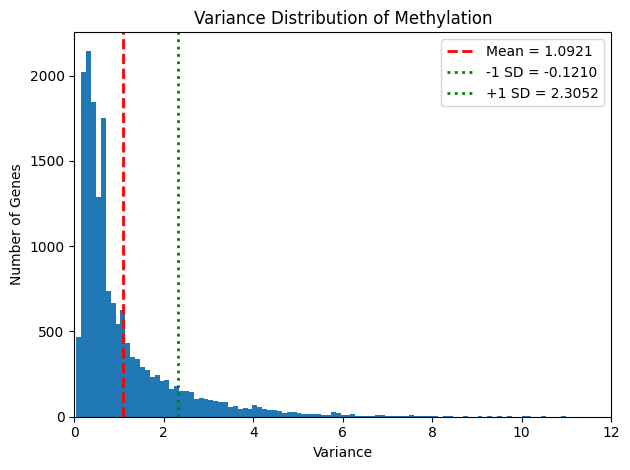

In [ ]:
plt.hist(methyl_variance.values, bins=100)
mean_var = methyl_variance.mean()
std_var = methyl_variance.std()
plt.axvline(mean_var, color='red', linestyle='--', linewidth=2, label=f"Mean = {mean_var:.4f}")
plt.axvline(mean_var - std_var, color='green', linestyle=':', linewidth=2, label=f"-1 SD = {mean_var - std_var:.4f}")
plt.axvline(mean_var + std_var, color='green', linestyle=':', linewidth=2, label=f"+1 SD = {mean_var + std_var:.4f}")

plt.title("Variance Distribution of Methylation")
plt.xlim((0,12))
plt.xlabel("Variance")
plt.ylabel("Number of Genes")
plt.legend()
plt.tight_layout()
plt.show()

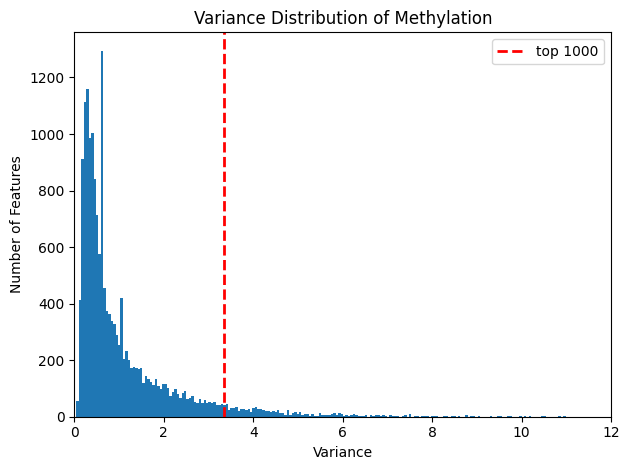

In [ ]:
plt.hist(methyl_variance.values, bins=200)
top_1000th = sorted(methyl_variance.to_list())[-1000]
std_var = methyl_variance.std()
plt.axvline(top_1000th, color='red', linestyle='--', linewidth=2, label=f"top 1000")
#plt.axvline(mean_var - std_var, color='green', linestyle=':', linewidth=2, label=f"-1 SD = {mean_var - std_var:.4f}")
#plt.axvline(mean_var + std_var, color='green', linestyle=':', linewidth=2, label=f"+1 SD = {mean_var + std_var:.4f}")

plt.title("Variance Distribution of Methylation")
plt.xlim((0,12))
plt.xlabel("Variance")
plt.ylabel("Number of Features")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
threshold = mean_var + std_var
selected_genes = methyl_variance[methyl_variance > threshold].index

In [ ]:
print(f"# of selected features: {len(selected_genes)}")

# of selected features: 2116


In [ ]:
GBM_methyl_train.loc[selected_genes].to_csv(f'{feature_selection_file_path}GBM_methylation_train_feature_selected_by_var_sd1.csv')
GBM_methyl_val.loc[selected_genes].to_csv(f'{feature_selection_file_path}GBM_methylation_val_feature_selected_by_var_sd1.csv')
GBM_methyl_external_test.loc[selected_genes].to_csv(f'{feature_selection_file_path}GBM_methylation_external_test_feature_selected_by_var_sd1.csv')
GBM_methyl_internal_test.loc[selected_genes].to_csv(f'{feature_selection_file_path}GBM_methylation_internal_test_feature_selected_by_var_sd1.csv')

LGG_methyl_train.loc[selected_genes].to_csv(f'{feature_selection_file_path}LGG_methylation_train_feature_selected_by_var_sd1.csv')
LGG_methyl_val.loc[selected_genes].to_csv(f'{feature_selection_file_path}LGG_methylation_val_feature_selected_by_var_sd1.csv')
LGG_methyl_external_test.loc[selected_genes].to_csv(f'{feature_selection_file_path}LGG_methylation_external_test_feature_selected_by_var_sd1.csv')
LGG_methyl_internal_test.loc[selected_genes].to_csv(f'{feature_selection_file_path}LGG_methylation_internal_test_feature_selected_by_var_sd1.csv')

In [ ]:
GBM_methyl_train.loc[methyl_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}GBM_methylation_train_feature_selected_top_{number_of_top_gene}.csv')
GBM_methyl_val.loc[methyl_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}GBM_methylation_val_feature_selected_top_{number_of_top_gene}.csv')
GBM_methyl_external_test.loc[methyl_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}GBM_methylation_external_test_feature_selected_top_{number_of_top_gene}.csv')
GBM_methyl_internal_test.loc[methyl_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}GBM_methylation_internal_test_feature_selected_top_{number_of_top_gene}.csv')

LGG_methyl_train.loc[methyl_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}LGG_methylation_train_feature_selected_top_{number_of_top_gene}.csv')
LGG_methyl_val.loc[methyl_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}LGG_methylation_val_feature_selected_top_{number_of_top_gene}.csv')
LGG_methyl_external_test.loc[methyl_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}LGG_methylation_external_test_feature_selected_top_{number_of_top_gene}.csv')
LGG_methyl_internal_test.loc[methyl_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}LGG_methylation_internal_test_feature_selected_top_{number_of_top_gene}.csv')

## SNV

In [ ]:
GBM_SNV_train = pd.read_csv(f'{split_file_path}GBM_SNV_train.csv', index_col=0)
GBM_SNV_val= pd.read_csv(f'{split_file_path}GBM_SNV_val.csv', index_col=0)
GBM_SNV_external_test= pd.read_csv(f'{split_file_path}GBM_SNV_external_test.csv', index_col=0)
GBM_SNV_internal_test= pd.read_csv(f'{split_file_path}GBM_SNV_internal_test.csv', index_col=0)

LGG_SNV_train= pd.read_csv(f'{split_file_path}LGG_SNV_train.csv', index_col=0)
LGG_SNV_val= pd.read_csv(f'{split_file_path}LGG_SNV_val.csv', index_col=0)
LGG_SNV_external_test= pd.read_csv(f'{split_file_path}LGG_SNV_external_test.csv', index_col=0)
LGG_SNV_internal_test= pd.read_csv(f'{split_file_path}LGG_SNV_internal_test.csv', index_col=0)

In [ ]:
SNV_train = pd.concat([GBM_SNV_train, LGG_SNV_train], axis=1)

In [ ]:
SNV_variance = SNV_train.var(axis = 1)

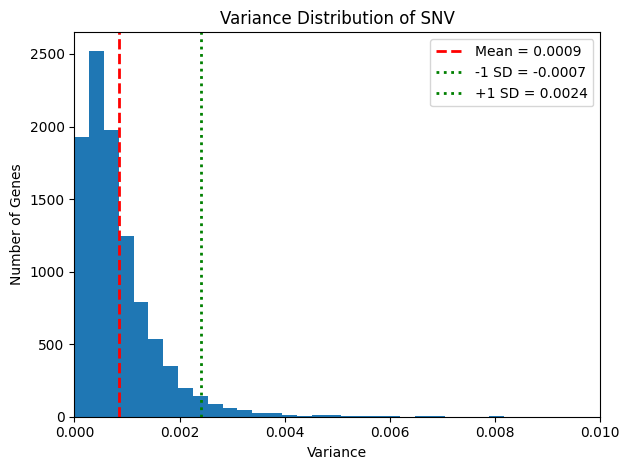

In [ ]:
plt.hist(SNV_variance.values, bins=400)
mean_var = SNV_variance.mean()
std_var = SNV_variance.std()
plt.axvline(mean_var, color='red', linestyle='--', linewidth=2, label=f"Mean = {mean_var:.4f}")
plt.axvline(mean_var - std_var, color='green', linestyle=':', linewidth=2, label=f"-1 SD = {mean_var - std_var:.4f}")
plt.axvline(mean_var + std_var, color='green', linestyle=':', linewidth=2, label=f"+1 SD = {mean_var + std_var:.4f}")

plt.title("Variance Distribution of SNV")
plt.xlim((0,0.01))
plt.xlabel("Variance")
plt.ylabel("Number of Genes")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
threshold = mean_var + std_var
selected_genes = SNV_variance[SNV_variance > threshold].index

In [ ]:
print(f"# of selected features: {len(selected_genes)}")

# of selected features: 371


In [ ]:
GBM_SNV_train.loc[selected_genes].to_csv(f'{feature_selection_file_path}GBM_SNV_train_feature_selected_by_var_sd1.csv')
GBM_SNV_val.loc[selected_genes].to_csv(f'{feature_selection_file_path}GBM_SNV_val_feature_selected_by_var_sd1.csv')
GBM_SNV_external_test.loc[selected_genes].to_csv(f'{feature_selection_file_path}GBM_SNV_external_test_feature_selected_by_var_sd1.csv')
GBM_SNV_internal_test.loc[selected_genes].to_csv(f'{feature_selection_file_path}GBM_SNV_internal_test_feature_selected_by_var_sd1.csv')

LGG_SNV_train.loc[selected_genes].to_csv(f'{feature_selection_file_path}LGG_SNV_train_feature_selected_by_var_sd1.csv')
LGG_SNV_val.loc[selected_genes].to_csv(f'{feature_selection_file_path}LGG_SNV_val_feature_selected_by_var_sd1.csv')
LGG_SNV_external_test.loc[selected_genes].to_csv(f'{feature_selection_file_path}LGG_SNV_external_test_feature_selected_by_var_sd1.csv')
LGG_SNV_internal_test.loc[selected_genes].to_csv(f'{feature_selection_file_path}LGG_SNV_internal_test_feature_selected_by_var_sd1.csv')

In [ ]:
GBM_SNV_train.loc[SNV_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}GBM_SNV_train_feature_selected_top_{number_of_top_gene}.csv')
GBM_SNV_val.loc[SNV_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}GBM_SNV_val_feature_selected_top_{number_of_top_gene}.csv')
GBM_SNV_external_test.loc[SNV_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}GBM_SNV_external_test_feature_selected_top_{number_of_top_gene}.csv')
GBM_SNV_internal_test.loc[SNV_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}GBM_SNV_internal_test_feature_selected_top_{number_of_top_gene}.csv')

LGG_SNV_train.loc[SNV_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}LGG_SNV_train_feature_selected_top_{number_of_top_gene}.csv')
LGG_SNV_val.loc[SNV_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}LGG_SNV_val_feature_selected_top_{number_of_top_gene}.csv')
LGG_SNV_external_test.loc[SNV_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}LGG_SNV_external_test_feature_selected_top_{number_of_top_gene}.csv')
LGG_SNV_internal_test.loc[SNV_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}LGG_SNV_internal_test_feature_selected_top_{number_of_top_gene}.csv')

## Protein

In [ ]:
GBM_protein_train = pd.read_csv(f'{split_file_path}GBM_protein_train.csv', index_col=0)
GBM_protein_val= pd.read_csv(f'{split_file_path}GBM_protein_val.csv', index_col=0)
GBM_protein_external_test= pd.read_csv(f'{split_file_path}GBM_protein_external_test.csv', index_col=0)
GBM_protein_internal_test= pd.read_csv(f'{split_file_path}GBM_protein_internal_test.csv', index_col=0)

LGG_protein_train= pd.read_csv(f'{split_file_path}LGG_protein_train.csv', index_col=0)
LGG_protein_val= pd.read_csv(f'{split_file_path}LGG_protein_val.csv', index_col=0)
LGG_protein_external_test= pd.read_csv(f'{split_file_path}LGG_protein_external_test.csv', index_col=0)
LGG_protein_internal_test= pd.read_csv(f'{split_file_path}LGG_protein_internal_test.csv', index_col=0)

In [ ]:
protein_train = pd.concat([GBM_protein_train, LGG_protein_train], axis=1)

In [ ]:
protein_variance = protein_train.var(axis = 1)

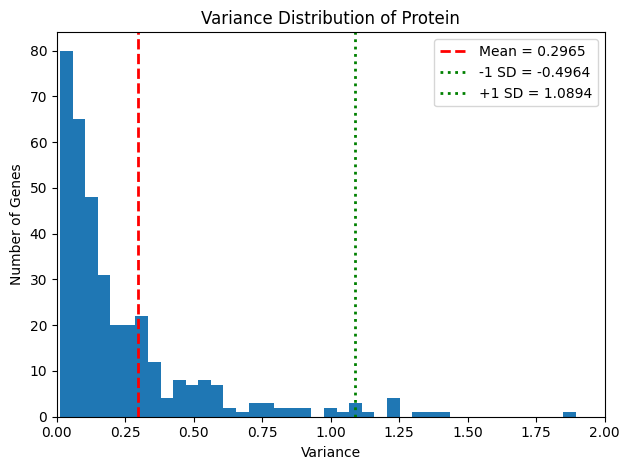

In [ ]:
plt.hist(protein_variance.values, bins=300)
mean_var = protein_variance.mean()
std_var = protein_variance.std()
plt.axvline(mean_var, color='red', linestyle='--', linewidth=2, label=f"Mean = {mean_var:.4f}")
plt.axvline(mean_var - std_var, color='green', linestyle=':', linewidth=2, label=f"-1 SD = {mean_var - std_var:.4f}")
plt.axvline(mean_var + std_var, color='green', linestyle=':', linewidth=2, label=f"+1 SD = {mean_var + std_var:.4f}")

plt.title("Variance Distribution of Protein")
plt.xlim((0,2))
plt.xlabel("Variance")
plt.ylabel("Number of Genes")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
threshold = mean_var + std_var
selected_genes = protein_variance[protein_variance > threshold].index

In [ ]:
print(f"# of selected features: {len(selected_genes)}")

# of selected features: 15


In [ ]:
GBM_protein_train.loc[protein_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}GBM_protein_train_feature_selected_top_{number_of_top_gene}.csv')
GBM_protein_val.loc[protein_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}GBM_protein_val_feature_selected_top_{number_of_top_gene}.csv')
GBM_protein_external_test.loc[protein_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}GBM_protein_external_test_feature_selected_top_{number_of_top_gene}.csv')
GBM_protein_internal_test.loc[protein_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}GBM_protein_internal_test_feature_selected_top_{number_of_top_gene}.csv')

LGG_protein_train.loc[protein_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}LGG_protein_train_feature_selected_top_{number_of_top_gene}.csv')
LGG_protein_val.loc[protein_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}LGG_protein_val_feature_selected_top_{number_of_top_gene}.csv')
LGG_protein_external_test.loc[protein_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}LGG_protein_external_test_feature_selected_top_{number_of_top_gene}.csv')
LGG_protein_internal_test.loc[protein_variance.sort_values(ascending=False).head(number_of_top_gene).index].to_csv(f'{feature_selection_file_path}LGG_protein_internal_test_feature_selected_top_{number_of_top_gene}.csv')